In [2]:

import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


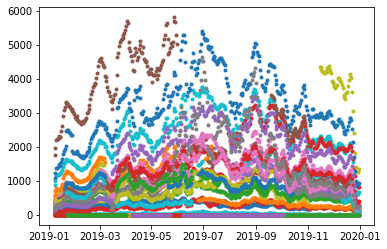

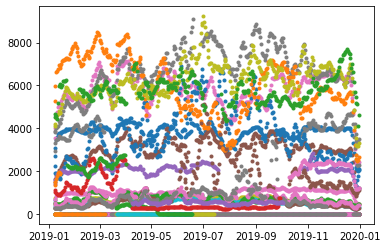

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 14 10:51:03 2020

@author: tsimpson
"""
df = pd.read_csv('2019_verkehrszaehlungen_werte_fussgaenger_velo.csv')



df['VELO_IN']=df['VELO_IN'].fillna(0)
df['VELO_OUT']=df['VELO_OUT'].fillna(0)
df['FUSS_IN']=df['FUSS_IN'].fillna(0)
df['FUSS_OUT']=df['FUSS_OUT'].fillna(0)
df['DATUM']= pd.to_datetime(df['DATUM']) 
df['JUST_DATE'] = df['DATUM'].dt.date


# Add a sum of all traffic variable = (sum of velos in and out and fussgaenger in and out)

Traffic_sum = df['VELO_IN']+df['VELO_OUT']+df['FUSS_IN']+df['FUSS_OUT']
Velo_sum = df['VELO_IN']+df['VELO_OUT']
Fuss_sum = df['FUSS_IN']+df['FUSS_OUT']

df['TRAFFIC_SUM'] = Traffic_sum
df['VELO_SUM'] = Velo_sum
df['FUSS_SUM'] = Fuss_sum


df2 = df.groupby(['JUST_DATE','FK_STANDORT'], as_index=False)[['TRAFFIC_SUM','VELO_SUM','FUSS_SUM']].sum()

    

numLocs = df2['FK_STANDORT'].nunique()

#plt.figure(0)
#for i in range(numLocs):
#    plt.plot(df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['JUST_DATE'],df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['VELO_SUM'])
    
#plt.figure(1)
#for i in range(numLocs):
#    plt.plot(df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['JUST_DATE'],df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['FUSS_SUM'])

## New thin
    
velosday = df2.pivot_table('VELO_SUM', ['JUST_DATE'], 'FK_STANDORT')
velosday = velosday.rolling(7).mean()


plt.figure(2)
plt.plot(velosday.index,velosday[:],'.');



fussday = df2.pivot_table('FUSS_SUM', ['JUST_DATE'], 'FK_STANDORT')
fussday = fussday.rolling(7).mean()


plt.figure(3)
plt.plot(fussday.index,fussday[:],'.');


Now lets take only the measurement points showing the highest values just to make things a little clearer


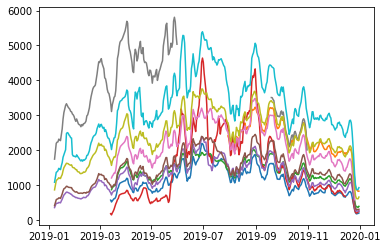

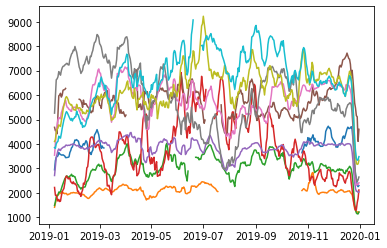

In [5]:
temp = velosday.sum()
templist = temp.to_numpy()
ind = np.argsort(templist)

LocInds = ind[-10:]

Velosday = velosday.iloc[:,LocInds]
plt.figure()
plt.plot(Velosday.index,Velosday[:]);


temp = fussday.sum()
templist = temp.to_numpy()
ind = np.argsort(templist)

LocInds = ind[-10:]

Fussday = fussday.iloc[:,LocInds]

plt.figure()
plt.plot(Fussday.index,Fussday[:]);

<bound method NDFrame.head of             Temp  precipitation
Date                           
2019-01-01   5.7            0.0
2019-01-01   5.7            0.0
2019-01-01   5.6            0.0
2019-01-01   5.6            0.0
2019-01-01   5.6            0.0
...          ...            ...
2019-12-31   0.1            0.0
2019-12-31   0.2            0.0
2019-12-31   0.2            0.0
2019-12-31   0.2            0.0
2019-12-31   0.2            0.0

[52505 rows x 2 columns]>


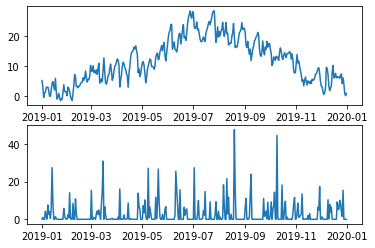

In [31]:
weather = pd.read_csv('messwerte_mythenquai_2007-2019.csv')
data_top = weather.head
weather['timestamp_cet']= pd.to_datetime(weather['timestamp_cet']) 

weatherdf = pd.DataFrame()
weatherdf['Date'] = weather['timestamp_cet'].dt.date
weatherdf['Temp'] = weather['air_temperature']
weatherdf['precipitation'] = weather['precipitation']


startdate = pd.to_datetime("2019-1-1").date()
enddate = pd.to_datetime("2019-12-31").date()

weatherdf = weatherdf.set_index(['Date'])
weatherdf = weatherdf.loc[startdate:enddate]

print(weatherdf.head)

weatherdfGroup = weatherdf.groupby(['Date'])
function_dict = {"Temp":"mean", "precipitation":"sum"}
weatherdfGroup = weatherdfGroup.aggregate(function_dict)

plt.figure()
plt.subplot(2,1,1)
plt.plot(weatherdfGroup.index,weatherdfGroup['Temp'])
plt.subplot(2,1,2)
plt.plot(weatherdfGroup.index, weatherdfGroup['precipitation'])
